<a href="https://colab.research.google.com/github/jack4593/jack4593/blob/main/Sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim of this little project was to look at the tweets of various political figures and track their sentiment across time 

In [ ]:
#import the packages...
import tweepy
from  textblob import TextBlob
from  wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from pylab import *
plt.style.use('fivethirtyeight')
print('Imports complete')

In [56]:
#Get the Data 
log = pd.read_csv('Login.csv')
print('Import complete')

Import complete


In [ ]:
#Twitter API Credentials 
consumerKey = log['Key'][0]
consumersecret = log['Key'][1]
brearer_token = log['Key'][2]
accesstoken = log['Key'][3]
accesstokensecret = log['Key'][4]

In [ ]:
#authentication object creation
authenticate = tweepy.OAuthHandler(consumerKey, consumersecret)
# Set Access Token Secret 

authenticate.set_access_token(accesstoken, accesstokensecret)

# API Object while passing authentication infromation 
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [ ]:
# Extract 100 Tweets from User
posts = api.user_timeline(screen_name='BorisJohnson', count = 1000, lang = 'eng', tweet_mode = 'extended')

In [ ]:
#print last 5 tweets from accoutn 
print ("Show 5 recent tweets")
for tweet in posts [0:5]:
  print (tweet.full_text +'/n')

Show 5 recent tweets
Strengthening security. 

Defending democracy. 

Supporting Ukraine. 

@NATO stands united. https://t.co/KT2gAdEJB8/n
25 years ago we made a promise to the people of Hong Kong.
 
We intend to keep it. https://t.co/nIN96ZydgV/n
Great news: in less than six months we’ve supported half a million people into work.
 
Helping people find the security of a stable income, through a job they can take pride in, is one of the best ways for people support their families during these challenging times. https://t.co/uaeeE77Phy/n
Russia is stirring violence and secessionism in Bosnia &amp; Herzegovina to undermine and destabilise the region. 

We are answering the call from our friends to help protect the hard-won peace.

🇬🇧🇧🇦 https://t.co/cl1e5h6JnH/n
The UK is leading the way in providing vital military assistance to Ukraine.

We continue to stand squarely behind President @ZelenskyyUa and the Ukrainian people to ensure Putin fails 🇬🇧🇺🇦 https://t.co/rPRgrs5Iwu/n


In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])

df.head()

,Tweets
0,Strengthening security. \n\nDefending democrac...
1,25 years ago we made a promise to the people o...
2,Great news: in less than six months we’ve supp...
3,Russia is stirring violence and secessionism i...
4,The UK is leading the way in providing vital m...


In [ ]:
#clean the text 

#create a function to clean the data
def CleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text) #Removed @mentions
  text = re.sub(r'#', '', text)# remove hashtags
  text = re.sub(r'RT[[\s]+','', text) # remove RT
  text = re.sub(r'https?:\/\/\S+','', text)# remove hyper links
  return text

In [ ]:
#apply the cleaning function
df['Tweets'] = df['Tweets'].apply(CleanText)


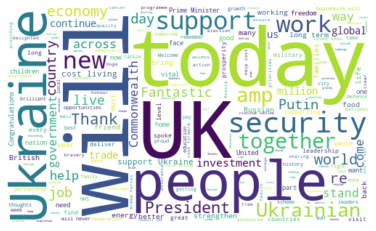

In [ ]:
#plot a word cluoud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud (width=500, height = 300, random_state = 20, background_color='white', max_font_size =119).generate(allWords)
#create the word cloud
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# create function to get subjectivity on
def getSubjectivity  (text):
  return TextBlob(text).sentiment.subjectivity

# function to get polarity pos or neg?
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create columns 
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Strengthening security. \n\nDefending democrac...,0.250000,0.250000
1,25 years ago we made a promise to the people o...,0.000000,0.000000
2,Great news: in less than six months we’ve supp...,0.456667,0.393333
3,Russia is stirring violence and secessionism i...,0.000000,0.000000
4,The UK is leading the way in providing vital m...,0.375000,-0.225000
...,...,...,...
195,I have one message for you today: Ukraine will...,0.600000,0.600000
196,"This is Ukraine’s finest hour, an epic chapter...",0.483333,0.166667
197,It was a fantastic day to be out campaigning i...,0.650000,0.150000
198,Nuclear power stations like the one I visited ...,0.530909,0.200606


In [ ]:
#create function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df.head(100)

,Tweets,Subjectivity,Polarity,Analysis
0,Strengthening security. \n\nDefending democrac...,0.250000,0.250000,positive
1,25 years ago we made a promise to the people o...,0.000000,0.000000,Neutral
2,Great news: in less than six months we’ve supp...,0.456667,0.393333,positive
3,Russia is stirring violence and secessionism i...,0.000000,0.000000,Neutral
4,The UK is leading the way in providing vital m...,0.375000,-0.225000,Negative
...,...,...,...,...
95,Congratulations to the city of Bradford on bec...,0.800000,0.412500,positive
96,"We want to hear from more parents, teachers, p...",0.366667,0.166667,positive
97,Important discussion on children’s mental heal...,0.580000,0.160000,positive
98,I spoke to 🇵🇰 Prime Minister today and welcom...,0.000000,0.000000,Neutral


In [ ]:
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range (0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'positive'):
   print(str(j)+ ') '+sortedDF['Tweets'][i])
   j = j+1
   print()
   

1) Strengthening security. 

Defending democracy. 

Supporting Ukraine. 

 stands united. 

2) Great news: in less than six months we’ve supported half a million people into work.
 
Helping people find the security of a stable income, through a job they can take pride in, is one of the best ways for people support their families during these challenging times. 

3) A huge delight to meet  Magdalena Andersson and President  again.
 
The accession of Finland and Sweden to  will permanently strengthen our defensive Alliance, helping to keep us all safe.

WeAreNATO 

4) Good discussions with President . I welcome Türkiye's agreement with Sweden and Finland, paving the way for their accession to .
 
I'm grateful for the President's leadership on getting grain out of Ukraine – a crisis that's having global repercussions. 

5) At this  Leaders’ Summit, I’ll be urging fellow nations to continue to do everything they can to support Ukraine. 

The UK has always played a historic role in the  all

In [ ]:
#print the negative tweets

j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending = 'False')
for i in range (0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
   print(str(j)+ ') '+sortedDF['Tweets'][i])
   j = j+1
   print()

1) The UK is leading the way in providing vital military assistance to Ukraine.

We continue to stand squarely behind President  and the Ukrainian people to ensure Putin fails 🇬🇧🇺🇦 

2) This lasting legacy will help other families to avoid the pain of having their grief compounded by offenders who cruelly refuse to disclose information about their victims.

(2/2)

3) This Government is making our streets safer by ensuring those guilty of heinous crimes get the punishments they deserve and spend longer behind bars to protect the public. 

4) Putin’s actions in Ukraine are creating terrible aftershocks, driving up energy and food prices across the world. 

Global leaders need to come together to help Ukraine and make life easier for households across the world. 

Nothing should be off the table. 

5) We wanted to pay a special tribute to  as he sadly couldn’t be with us in person at the  ⤵️ 

6) We must support Ukraine to strengthen their hand in both the war and any future negotiations.

Text(0, 0.5, 'Subjectivity')

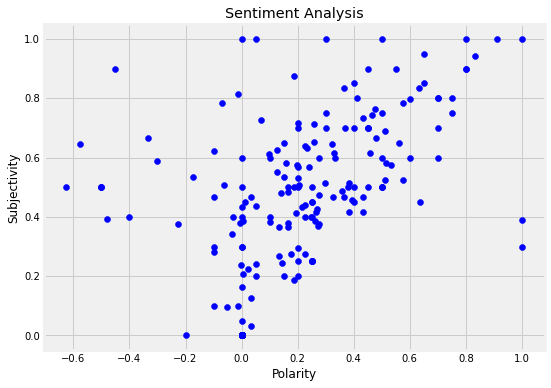

In [ ]:
#plot the polarity and subjectivity 
plt.figure(figsize=(8,6))

for i in range (0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [ ]:
#get the % of positive tweets 
ptweets = df[df.Analysis == 'positive']
ptweets = ptweets['Tweets']

posper = round( (ptweets.shape[0])/df.shape[0]*100,1)
posper
#print("% of Positive Tweets is" + posper)

69.0

In [ ]:
#get the % of positive tweets 
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['Tweets']

negper = round( (ptweets.shape[0])/df.shape[0]*100,1)
negper

13.5

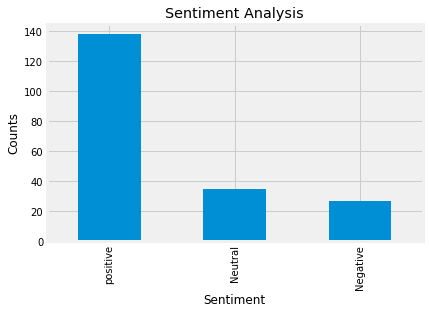

In [ ]:
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df.Analysis.value_counts().plot(kind='bar')
plt.show()